<a href="https://colab.research.google.com/github/vijayshankarrealdeal/intro_to_pytorch-Gans/blob/main/PytorchData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import torch
import numpy as np

In [94]:
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

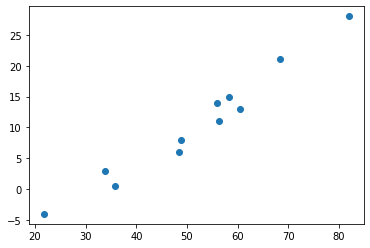

In [97]:
plt.scatter(t_u,t_c)
plt.show()

In [102]:
def model(t_u,w,b):
  return w*t_u + b

In [103]:
def loss_fn(y_hat,y):
  y_ = (y_hat-y)**2
  return y_.mean()


In [104]:
loss = torch.nn.MSELoss()

In [105]:
W = torch.ones(())
b = torch.zeros(())

In [106]:
W,b

(tensor(1.), tensor(0.))

In [107]:
pred = model(t_u,W,b)
loss = loss_fn(pred,t_c)

In [108]:
pred,loss

(tensor([35.7000, 55.9000, 58.2000, 81.9000, 56.3000, 48.9000, 33.9000, 21.8000,
         48.4000, 60.4000, 68.4000]), tensor(1763.8848))

In [109]:
delta = 0.01
learning_rate = 1e-2
for i in range(20):
  y_pred = model(t_u,w-delta,b)
  loss = loss_fn(y_pred,t_c)
  y_pred_ = model(t_u,w+delta,b)
  loss_ = loss_fn(y_pred,t_c)
  loss_rate = (loss - loss_)/2*delta
  W = W - learning_rate * loss_rate

  loss_rate_of_change_b = (loss_fn(model(t_u, W, b + delta), t_c) -loss_fn(model(t_u, W, b - delta), t_c)) / (2.0 * delta)
  b = b - learning_rate * loss_rate_of_change_b